In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pitch = pd.read_csv('pitching.csv')
df_pitching = pd.DataFrame(pitch)

play = pd.read_csv('players.csv')
df_players = pd.DataFrame(play)

tea = pd.read_csv('teams.csv')
df_teams = pd.DataFrame(tea)

## Task1.1 Compute the total number of wins for each of the teams in MLB over 2011-2015, sort them in a descending order

In [3]:
win = df_teams.query('yearID == [2011,2012,2013,2014,2015]').sort_values(by='yearID')
team = win["teamID"].values
W = win["W"].values
t = set(team)
teamlist = list(t)
wintotal = []

for i in range(len(teamlist)):
    temp =[]
    for j in range(len(team)):
        if(teamlist[i]==team[j]):
            temp.append(W[j])
    
    m = np.sum(temp)
    wintotal.append(m)

a = {"teamID":teamlist,"wins":wintotal}
wint = pd.DataFrame(a)
wtotal = wint.sort_values(by='wins',ascending=False)
wtotal

,teamID,wins
9,SLN,465
20,NYA,448
24,LAN,446
15,WAS,443
25,DET,440
10,LAA,436
19,TEX,435
3,PIT,431
27,TBA,430
17,SFN,428


## Task1.2 Compute the average payroll per year for all teams over 2011-2015, sort them in a descending order

In [4]:
pay = df_players.query('yearID == [2011,2012,2013,2014,2015]').sort_values(by='yearID')
team = pay["teamID"].values
t = set(team)
teamlist = list(t)
salary = pay["salary"].values 
payroll = []

for i in range(len(teamlist)):
    mean = []
    for j in range(len(team)):
        if(teamlist[i]==team[j]):
            mean.append(salary[j])
    
    m = np.nanmean(mean)
    payroll.append(m)

a1 = {"teamID":teamlist,"payroll":payroll}
payro = pd.DataFrame(a1)
paylist = payro.sort_values(by="payroll",ascending=False)
paylist

,teamID,payroll
20,NYA,7.638713e+06
5,PHI,5.721195e+06
24,LAN,5.642426e+06
25,DET,5.513730e+06
29,BOS,5.184631e+06
17,SFN,5.056022e+06
10,LAA,4.835898e+06
19,TEX,4.265301e+06
26,CHA,4.114336e+06
9,SLN,3.926359e+06


## Create a visualization of your choice which will all allow you to show whether a team’s winning record is related to its payroll. So is a team’s winning record related to its payroll?

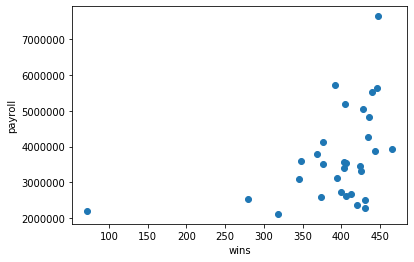

In [5]:
payroll_related = pd.merge(paylist,wtotal,on = "teamID")
plt.figure()
y = payroll_related["payroll"].values
x = payroll_related["wins"].values
plt.xlabel("wins")
plt.ylabel("payroll")
plt.scatter(x,y)
plt.show()


## 並沒有太大關係，薪資最高的的確有較高勝率，薪資低的勝率的確有幾隊獲勝場數較少，但也有好幾隊薪資低的獲勝場數在前段班

## Task2.1 Compute the Batting Averages for each of the MLB teams over 2011-2015, sort them in a descendingorder. The Batting Average is defined as Hits/At Bats. The average is calculated from all players in each team

In [6]:
BA = df_players.query('yearID == [2011,2012,2013,2014,2015]').sort_values(by='yearID')
H = BA["H"].values
AB = BA["AB"].values
team = BA["teamID"].values
t = set(team)
teamlist = list(t)
BAlist = []

for i in range(len(teamlist)):
    mean = []
    for j in range(len(team)):
        if(teamlist[i]==team[j]):
            if(AB[j]!=0):
                ba = H[j]/AB[j]
                mean.append(ba)
    
    me = np.mean(mean)
    BAlist.append(me)

a2 = {"teamID":teamlist,"BA":BAlist}
BattingA = pd.DataFrame(a2)
BattingA.sort_values(by="BA",ascending=False)

,teamID,BA
4,CLE,0.221480
19,TEX,0.214438
25,DET,0.213173
10,LAA,0.209346
11,HOU,0.205487
15,WAS,0.205166
1,KCA,0.204030
26,CHA,0.202099
29,BOS,0.200775
14,BAL,0.199686


## Task2.2 Create a visualization of your choice which will allow you to decide whether a team’s batting average is related to its win-loss record. So is a team’s winning record related to its batting average?

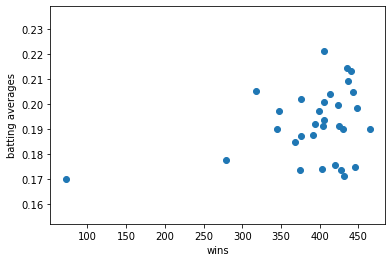

In [7]:
BArelated = pd.merge(BattingA,wtotal,on="teamID")
plt.figure()
y = BArelated["BA"].values
x = BArelated["wins"].values
plt.xlabel("wins")
plt.ylabel("batting averages")
plt.scatter(x,y)
plt.show()

## 從batting averages跟win的場次來看，Batting averages在前段班的獲勝場次上，從高到低都有，且關係性比payroll還差一點

## Task3.1 Display the average ERA (Earned Run Average) for each of the MLB teams in 2011-2015, sort them in a descending order. A lower ERA indicates a better pitching performance.

In [8]:
ERArelated = df_pitching.query('yearID == [2011,2012,2013,2014,2015]').sort_values(by='yearID')
era = ERArelated["ERA"].values
team = ERArelated["teamID"].values
t = set(team)
teamlist = list(t)
ERAlist = []

for i in range(len(teamlist)):
    mean = []
    for j in range(len(team)):
        if(teamlist[i]==team[j]):
            mean.append(era[j])
    
    me = np.nanmean(mean)
    ERAlist.append(me)

a3 = {"teamID":teamlist,"ERA":ERAlist}
aERA = pd.DataFrame(a3)
aERA.sort_values(by="ERA",ascending=False)

,teamID,ERA
2,TOR,6.277933
11,LAA,6.012016
13,NYN,5.886875
20,NYA,5.846667
7,COL,5.826370
25,DET,5.565317
22,CHN,5.385108
10,HOU,5.266063
5,PHI,5.153769
6,ARI,5.130488


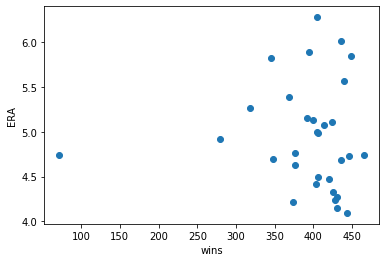

In [9]:
erarleated = pd.merge(aERA,wtotal,on = "teamID")
plt.figure()
y = erarleated["ERA"].values
x = erarleated["wins"].values
plt.xlabel("wins")
plt.ylabel("ERA")
plt.scatter(x,y)
plt.show()

## ERA跟wins的關係非常差，可以看到ERA不論高低，在獲勝場數上是完全散亂的狀態